Toy Problem

* S = {$s^1, s^2$}  
* A = { LEFT, RIGHT }  
* R = $ \begin{bmatrix} 1 \\ 5 \end{bmatrix}$

Transition Probabilities

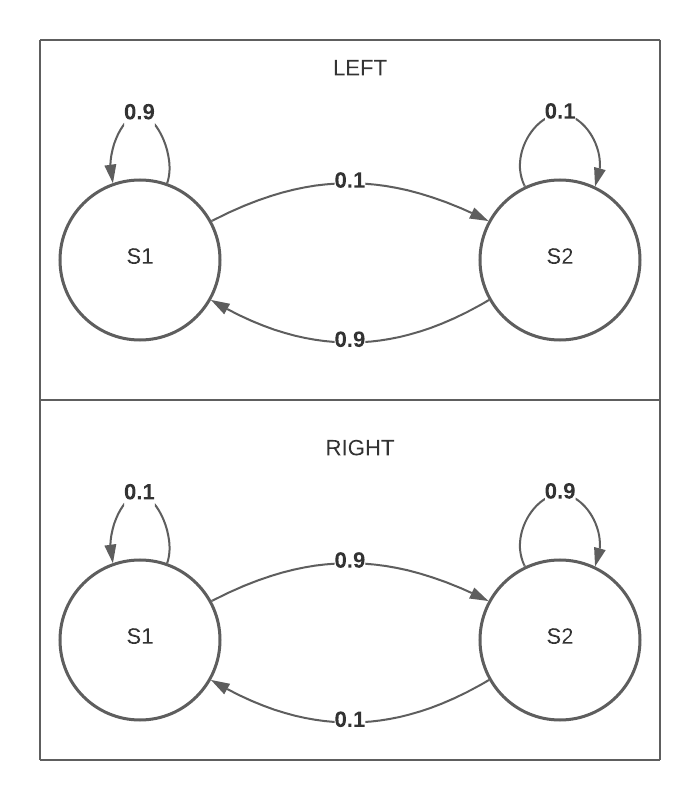

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import random

In [ ]:
STATES  = ['s1', 's2']
ACTIONS = ['LEFT', 'RIGHT']
REWARD  = {'s1':1, 's2':5}
GAMMA = 0.9

In [ ]:
PROB = {
    "s1":{
        "LEFT"  : { "s1": 0.9, "s2":0.1 },
        "RIGHT" : { "s1": 0.1, "s2":0.9 }
    },
    "s2":{
        "LEFT"  : { "s1": 0.9, "s2":0.1 },
        "RIGHT" : { "s1": 0.1, "s2":0.9 }
    }
}

In [ ]:
P = lambda pi : np.array(
                    [   [ PROB['s1'][ pi['s1'] ]['s1'], PROB['s1'][ pi['s1'] ]['s2'] ],
                        [ PROB['s2'][ pi['s2'] ]['s1'], PROB['s2'][ pi['s2'] ]['s2'] ]
                    ]
                )

## Question 1
**Policies**

In [ ]:
# Total of 4 policies (2 states * 2 actions)

policy = [dict(zip(STATES, i)) for i in itertools.product(ACTIONS, repeat=len(STATES)) ]   

In [ ]:
print("Number of policies = %d" % len(policy) )

Number of policies = 4


## Question 2

**Value of a policy $\pi$**
* $ V^\pi = R * (I-\gamma P^\pi )^{-1} $

In [ ]:
def V_PI( pi ):
    R = np.array( list( REWARD.values() ) )
    n = R.shape[0]
    inv = np.linalg.inv( np.identity(n) - GAMMA * P( pi ) )
    return np.matmul(inv, R)

In [ ]:
for pi in policy:
    print("Policy: ", pi, "\nhas value: ", V_PI( pi ), "\n")

Policy:  {'s1': 'LEFT', 's2': 'LEFT'} 
has value:  [13.6 17.6] 

Policy:  {'s1': 'LEFT', 's2': 'RIGHT'} 
has value:  [22.85714286 37.14285714] 

Policy:  {'s1': 'RIGHT', 's2': 'LEFT'} 
has value:  [28.8372093 31.1627907] 

Policy:  {'s1': 'RIGHT', 's2': 'RIGHT'} 
has value:  [42.4 46.4] 



## Question 3

In [ ]:
# Bellman Operator
def T(v):
    V = dict(zip( STATES, v ))
    Tv = []
    for si in STATES:
        iter = []
        for a in ACTIONS:
            val = 0
            for sj in STATES:
                val += PROB[si][a][sj]*( REWARD[si] + GAMMA * V[sj] )
            iter.append( val )
        Tv.append( max( iter ) )
    return np.array(Tv)

In [ ]:
def Value_Iteration(epochs=250):
    y1, y2 = [], []
    V = np.zeros(len(STATES) )
    for _ in range(epochs):
        y1.append(V[0])
        y2.append(V[1])
        V = T(V)
    y1.append(V[0])
    y2.append(V[1])
    x = list( range(len(y1)))
    plt.plot(x, y1, x, y2)
    plt.show()
    return V

* The value seems to converge to [42.4, 46.4] after at least 250 iterations. It doesn't increase on increasing the number of iterations

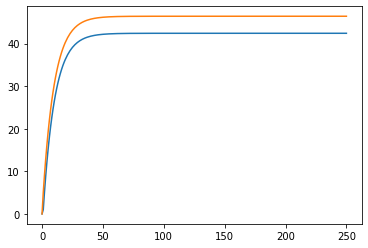

array([42.4, 46.4])

In [ ]:
Value_Iteration(250)

## Question 4

In [ ]:
# Bellman Operator
def argT(v):
    V = dict(zip( STATES, v ))
    Tv = {}
    for si in STATES:
        iter = []
        for a in ACTIONS:
            val = 0
            for sj in STATES:
                val += PROB[si][a][sj]*( REWARD[si] + GAMMA * V[sj] )
            iter.append( val )
        Tv[si] = ACTIONS[ np.argmax( np.array(iter) ) ]
    return Tv

In [ ]:
def Policy_Iteration(epochs=250):
    pi = { s: random.choice(ACTIONS) for s in STATES }
    print('Start Policy:', pi, ' Value: ', V_PI( pi ) )
    for _ in range(epochs):
        value = V_PI( pi )
        pi = argT(value)
    print('Final Policy:', pi, ' Value: ', V_PI( pi ) )
    return pi, V_PI( pi )          


In [ ]:
Policy_Iteration(250)

Start Policy: {'s1': 'LEFT', 's2': 'LEFT'}  Value:  [13.6 17.6]
Final Policy: {'s1': 'RIGHT', 's2': 'RIGHT'}  Value:  [42.4 46.4]


({'s1': 'RIGHT', 's2': 'RIGHT'}, array([42.4, 46.4]))